# Bài 1


Tạo ra 1 bộ dataset từ 10 điểm dữ liệu sinh ra từ hàm y = x^2 + noise. Dùng sklearn fit hàm đa thức bậc 9 với dữ liệu trên. Sau đó thêm 100 dữ liệu nữa xem hàm đa thức bậc 9 như nào?
- Hãy báo cáo MSE và vẽ đồ thị trong hai trường hợp (10 điểm dữ liệu ban đầu và 100 điểm dữ liệu sau)

- Hiện tượng gì đang xảy ra?

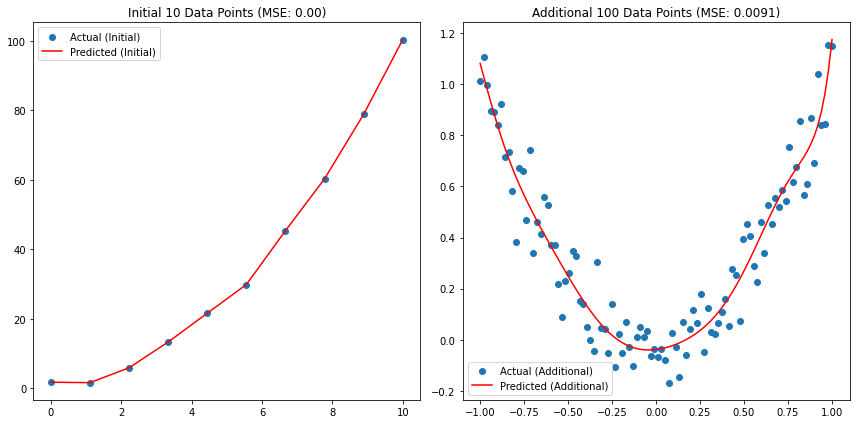

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def pred(x, y):
    # Create a 9th-degree polynomial features
    poly = PolynomialFeatures(degree=9)
    x_poly = poly.fit_transform(x.reshape(-1, 1))

    # Create a linear regression model
    model = LinearRegression()
    model.fit(x_poly, y)

    # Predict y values
    y_pred = model.predict(x_poly)
    return y_pred

# Generate the initial 10 data points with noise
np.random.seed(0)
x_initial = np.linspace(0, 10, 10)
y_initial = x_initial**2 + np.random.normal(0, 1, 10)

# Fit a 9th-degree polynomial to the initial data using the pred function
y_pred_initial = pred(x_initial, y_initial)

# Generate 100 more data points
x_additional = np.linspace(-1, 1, 100)
y_additional = x_additional**2 + np.random.normal(0, 0.1, 100)

# Predict using the pred function for the additional data points
y_pred_additional = pred(x_additional, y_additional)

# Calculate MSE for both cases
mse_initial = mean_squared_error(y_initial, y_pred_initial)
mse_additional = mean_squared_error(y_additional, y_pred_additional)

# Plot the results
plt.figure(figsize=(12, 6))

# Plot the initial 10 data points
plt.subplot(1, 2, 1)
plt.scatter(x_initial, y_initial, label='Actual (Initial)')
plt.plot(x_initial, y_pred_initial, color='red', label='Predicted (Initial)')
plt.title(f'Initial 10 Data Points (MSE: {mse_initial:.2f})')
plt.legend()

# Plot the 100 additional data points
plt.subplot(1, 2, 2)
plt.scatter(x_additional, y_additional, label='Actual (Additional)')
plt.plot(x_additional, y_pred_additional, color='red', label='Predicted (Additional)')
plt.title(f'Additional 100 Data Points (MSE: {mse_additional:.4f})')
plt.legend()

plt.tight_layout()
plt.show()


Hiện tượng xảy ra là overfitting vì nó đi qua tất cả 10 điềm dữ liệu nên MSE = 0
Khi tăng lên 100 điểm dữ liệu thì overfit đã k còn nữa và cải thiện hơn

# Bài 2

Code from scratch
- Implement hàm tính convolution
  - Input: X, W, stride, padding
  - Output: Y
- Kiểm tra lại với hàm tính convolution được implement trong thư viện Pytorch

In [2]:
import torch
import torch.nn.functional as F

# Define the input and kernel
x = torch.tensor([[[[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]]]], dtype=torch.float32)

weights = torch.tensor([[[[1, 0],
                         [0, -1]]]], dtype=torch.float32)

# Perform convolution using PyTorch
output = F.conv2d(x, weights, stride=1, padding=1)

# Print the result
print("Convolution result (PyTorch):")
print(output)


Convolution result (PyTorch):
tensor([[[[-1., -2., -3.,  0.],
          [-4., -4., -4.,  3.],
          [-7., -4., -4.,  6.],
          [ 0.,  7.,  8.,  9.]]]])


[W NNPACK.cpp:64] Could not initialize NNPACK! Reason: Unsupported hardware.


In [3]:
import numpy as np

def conv2d(input, kernel, stride=1, padding=0):
    batch_size, in_channels, in_height, in_width = input.shape
    out_channels, _, kernel_height, kernel_width = kernel.shape

    # Calculate the output dimensions
    out_height = (in_height + 2 * padding - kernel_height) // stride + 1
    out_width = (in_width + 2 * padding - kernel_width) // stride + 1

    # Initialize the output tensor
    output = np.zeros((batch_size, out_channels, out_height, out_width))

    # Perform the convolution
    padded_input = np.pad(input, ((0, 0), (0, 0), (padding, padding), (padding, padding)), mode='constant')
    for b in range(batch_size):
        for o in range(out_channels):
            for i in range(in_channels):
                for h in range(0, out_height * stride, stride):
                    for w in range(0, out_width * stride, stride):
                        output[b, o, h // stride, w // stride] += np.sum(
                            padded_input[b, i, h:h + kernel_height, w:w + kernel_width] * kernel[o, i, :, :])

    return output

# Define the input and kernel
x = np.array([[[[1, 2, 3],
                [4, 5, 6],
                [7, 8, 9]]]])

weights = np.array([[[[1, 0],
                      [0, -1]]]])

# Perform convolution using NumPy
output = conv2d(x, weights, stride=1, padding=1)

# Print the result
print("Convolution result (from scratch):")
print(output)


Convolution result (from scratch):
[[[[-1. -2. -3.  0.]
   [-4. -4. -4.  3.]
   [-7. -4. -4.  6.]
   [ 0.  7.  8.  9.]]]]


In [9]:
import tempfile

# Create a temporary directory for data download
data_path = tempfile.mkdtemp()

# Rest of your code remains the same


# Bài 3

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from sklearn.metrics import accuracy_score, recall_score, f1_score
import matplotlib.pyplot as plt


transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor(),
    transforms.Normalize((0.4915, 0.4823, 0.4468), (0.2470, 0.2435, 0.2616))
])


train_dataset = datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.CIFAR10(root='./data', train=False, transform=transform)

# Split the dataset into train and validation sets (80/20 split)
n_samples = len(train_dataset)
n_val = int(n_samples * 0.2)
n_train = n_samples - n_val
train_data, val_data = torch.utils.data.random_split(train_dataset, [n_train, n_val])

# Create data loaders
train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=64, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)


Files already downloaded and verified


In [9]:
class VGGNet(nn.Module):
    def __init__(self):
        super(VGGNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Linear(128 * 8 * 8, 512),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(512, 10)  # 10 classes for CIFAR-10
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.classifier(x)
        return x

model = VGGNet()


In [ ]:

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)

# Training loop
n_epochs = 30
train_losses = []
val_losses = []

for epoch in range(n_epochs):
    model.train()
    train_loss = 0.0

    for data, target in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()

    train_loss /= len(train_loader)
    train_losses.append(train_loss)

    # Validation
    model.eval()
    val_loss = 0.0

    with torch.no_grad():
        for data, target in val_loader:
            output = model(data)
            loss = criterion(output, target)
            val_loss += loss.item()

    val_loss /= len(val_loader)
    val_losses.append(val_loss)

    print(f'Epoch [{epoch + 1}/{n_epochs}] | Train Loss: {train_loss:.4f} | Val Loss: {val_loss:.4f}')

# Plot the loss graph
plt.plot(train_losses, label='Train loss')
plt.plot(val_losses, label='Val loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()



In [ ]:
# Evaluation on the test set
model.eval()
test_predictions = []
test_targets = []

with torch.no_grad():
    for data, target in test_loader:
        output = model(data)
        _, predicted = torch.max(output, 1)
        test_predictions.extend(predicted.cpu().numpy())
        test_targets.extend(target.cpu().numpy())

accuracy = accuracy_score(test_targets, test_predictions)
recall = recall_score(test_targets, test_predictions, average='macro')
f1 = f1_score(test_targets, test_predictions, average='macro')

print(f'Test Accuracy: {accuracy:.4f}')
print(f'Test Recall: {recall:.4f}')
print(f'Test F1-Score: {f1:.4f}')


# Bài 4

Tại sao khi build model, càng những layer phía sau, width và height giảm nhưng depth lại tăng

1 of the reason is because Pooling Layers are often used to downsample the spatial dimensions further. These layers reduce the width and height of the feature maps by selecting the most important information from a local region and discarding the rest. This downsampling helps reduce the computational cost and makes the network more robust to small translations and distortions in the input data.